In [1]:
import pypsa 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from custom_constraints import set_operational_limits
from pypsa.descriptors import get_switchable_as_dense as get_as_dense, get_activity_mask

In [28]:
#n0 = pypsa.Network('../networks/elec_grid-2040_30-supply_redz.nc')
n0 = pypsa.Network('../networks/solved_val-LC-UNC_1-supply_redz_lcopt_LC.nc')

INFO:pypsa.io:Imported network solved_val-LC-UNC_1-supply_redz_lcopt_LC.nc has buses, carriers, generators, loads, storage_units


In [29]:
ocgt = n0.generators[n0.generators.carrier.isin(['ocgt_gas','ocgt_diesel'])].index
ccgt_steam = n0.generators[n0.generators.carrier.isin(['ccgt_steam'])].index

In [37]:
n0.statistics()["Capacity Factor"]

2025          2030          2035  \
Generator   Biomass               6.290356e-01  5.996269e-01  5.568452e-01   
            Ccgt_Steam            8.449151e-02  1.301915e-01  1.865279e-01   
            Coal                  5.030532e-01  4.724599e-01  4.324669e-01   
            Hydro                 2.738110e-01  2.473465e-01  1.950765e-01   
            Hydro_Import          6.565813e-01  6.453631e-01  5.831723e-01   
            Load_Shedding         6.484107e-08  4.543344e-07  9.278748e-11   
            Nuclear               9.999872e-01  9.999711e-01  9.780309e-01   
            Ocgt_Diesel           2.582703e-02  3.359650e-02  3.905375e-02   
            Ocgt_Gas              6.732887e-02  1.258542e-01  1.524851e-01   
            Solar_Csp             1.576619e-02  1.096306e-02  1.188281e-02   
            Solar_Pv              2.293910e-01  2.085962e-01  2.040818e-01   
            Wind                  3.703974e-01  3.861045e-01  3.683206e-01   
Load        -                              NaN           NaN           NaN   
StorageUnit Battery               3.177073e-01  2.502202e-01  2.426582e-01   
            Pumped Hydro Storage  1.647856e-04  3.059172e-03  2.546500e-01   

                                          2040  
Generator   Biomass               4.847725e-01  
            Ccgt_Steam            2.433279e-01  
            Coal                  3.435494e-01  
            Hydro                 1.336186e-01  
            Hydro_Import          4.614959e-01  
            Load_Shedding         1.388925e-10  
            Nuclear               8.539697e-01  
            Ocgt_Diesel           5.364502e-02  
            Ocgt_Gas              1.990751e-01  
            Solar_Csp             2.285775e-02  
            Solar_Pv              1.979037e-01  
            Wind                  3.815224e-01  
Load        -                              NaN  
StorageUnit Battery               2.174302e-01  
            Pumped Hydro Storage  2.389856e-01

<Axes: xlabel='period,timestep'>

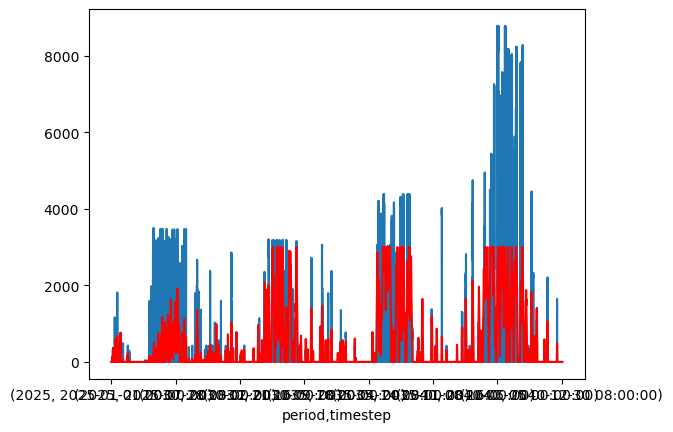

In [38]:
p_ocgt = n0.generators_t.p[ocgt].sum(axis=1)
p_st = n0.generators_t.p[ccgt_steam].sum(axis=1)
p_ocgt.plot()
p_st.plot(color='r')

<Axes: xlabel='timestep'>

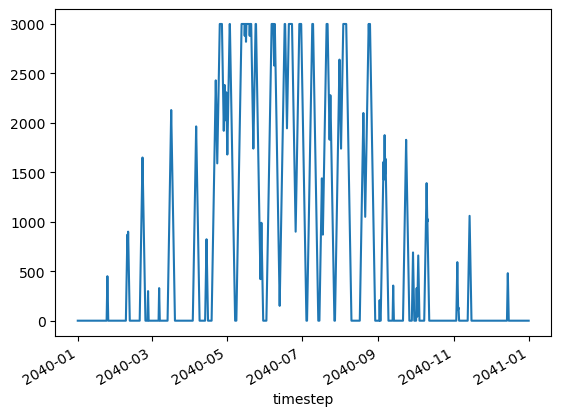

In [46]:
(p_st).loc[2040].loc["2040"].plot()


In [47]:
cl = n.generators.query("carrier == 'coal'").index
active = get_activity_mask(n0, "Generator", n0.snapshots).astype(int)
p_nom = active[cl] * n0.generators.loc[cl, "p_nom_opt"]
max = (get_as_dense(n0, "Generator", "p_max_pu")[cl] * p_nom).sum(axis=1)

<Axes: xlabel='period,timestep'>

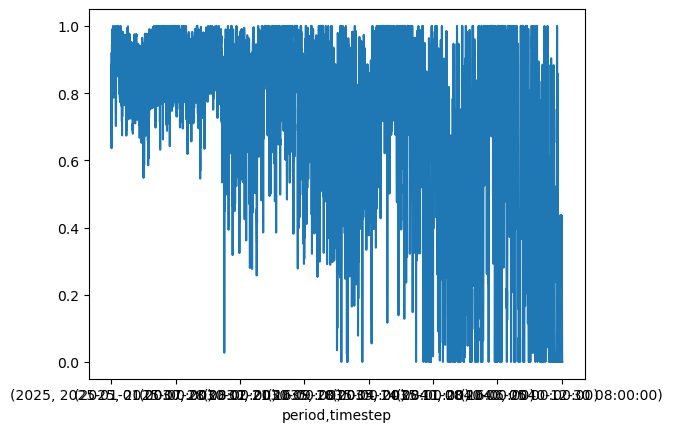

In [35]:
(n0.generators_t.p[cl].sum(axis=1)/max).plot()

In [48]:
n0.generators.ramp_limit_shut_down
# At each bus HRSG power is limited by what OCGT_gas or diesel is producing


Generator
Arnot*               0.053763
Arnot**              0.053763
Duvha*               0.052174
Duvha**              0.034783
Kendal*              0.031250
                       ...   
RSA-nuclear-2025     1.000000
RSA-nuclear-2030     1.000000
RSA-nuclear-2035     1.000000
RSA-nuclear-2040     1.000000
RSA_load_shedding    1.000000
Name: ramp_limit_shut_down, Length: 83, dtype: float64

In [112]:
n0.generators.query("carrier == 'coal' | carrier == 'ocgt_diesel'").index

Index(['Acacia', 'Ankerlig', 'Gourikwa', 'PortRex', 'Avon', 'Dedisa',
       'Sasol Infrach Engines', 'Sasol OCGT', 'RSA-ocgt_diesel-2025',
       'RSA-ocgt_diesel-2030', 'RSA-ocgt_diesel-2035', 'RSA-ocgt_diesel-2040'],
      dtype='object', name='Generator')

In [53]:
n0.generators.p_nom_opt.groupby(n0.generators.carrier).sum()


carrier
biomass                0.736983
ccgt_steam          2999.999973
coal               39266.694392
hydro                683.020000
hydro_import        1764.000000
load_shedding    1000000.000000
nuclear             1854.468611
ocgt_diesel        10722.879667
ocgt_gas             767.000000
solar_csp            500.000000
solar_pv           62035.111460
wind               37102.321873
Name: p_nom_opt, dtype: float64

In [11]:
n0.storage_units.p_nom_opt.groupby(n0.storage_units.carrier).sum()

carrier
battery    34953.591331
phs         2912.016350
Name: p_nom_opt, dtype: float64

In [12]:
n0.generators_t.p[n0.generators[n0.generators.carrier.isin(["ocgt_gas","ccgt_gas"])].index].sum(axis=1).groupby(level=0).sum()

period
2025       1.634336
2030       1.908440
2035       2.820819
2040    1301.613131
dtype: float64

In [17]:
n0.generators_t.p[n0.generators[n0.generators.carrier.isin(["loadshed"])].index].sum(axis=1).groupby(level=0).sum()

period
2025    0.0
2030    0.0
2035    0.0
2040    0.0
dtype: float64

In [15]:
n0.loads_t.p_set.sum(axis=1).groupby(level=0).sum()

period
2025    2.571553e+08
2030    2.769605e+08
2035    2.941598e+08
2040    3.113591e+08
dtype: float64

In [48]:
p_nom = n0.generators.query("carrier == 'ccgt_gas' & build_year <= 2040").p_nom_opt.sum()
p_nom 

8856.435999549343

In [49]:
425*8760

3723000

<AxesSubplot:xlabel='week'>

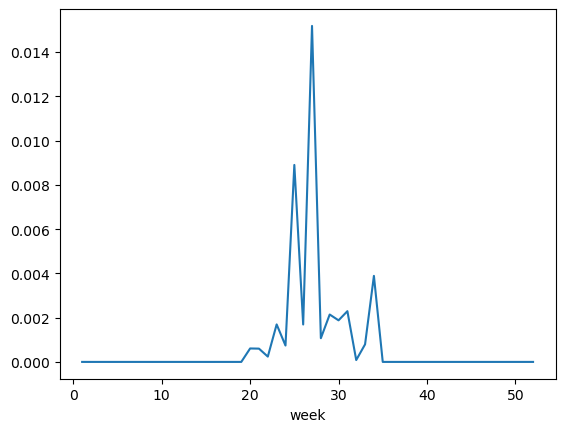

In [50]:
p = n0.snapshot_weightings.loc[2040,"generators"]*n0.generators_t.p.loc[2040,n0.generators.carrier=="ocgt_diesel"].sum(axis=1)
(p.groupby(p.index.isocalendar().week).sum()/(p_nom*168)).plot()

<AxesSubplot:xlabel='timestep'>

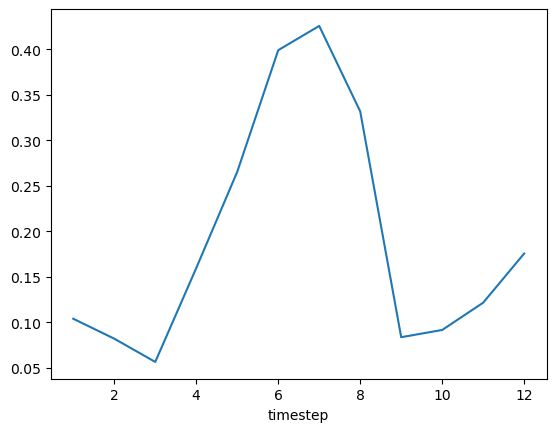

In [51]:
p_nom = n0.generators.query("carrier == 'ccgt_gas' & build_year <= 2040").p_nom_opt.sum()
p_nom 

p = n0.snapshot_weightings.loc[2040,"generators"]*n0.generators_t.p.loc[2040,n0.generators.carrier=="ccgt_gas"].sum(axis=1)
(p.groupby(p.index.month).mean()/(p_nom)).plot()

In [19]:
n0.statistics()["Capacity Factor"]

2025          2030          2035  \
Generator   Biomass               2.741036e-01  2.943951e-01  3.258897e-01   
            Ccgt_Steam            5.451779e-03  6.899646e-03  8.926374e-03   
            Coal                  1.330112e-02  9.458571e-03  1.121617e-02   
            Hydro                 2.053298e-02  1.489580e-02  1.847305e-02   
            Hydro_Import          9.353391e-02  6.599680e-02  5.741600e-02   
            Load_Shedding         1.140477e-12  1.690731e-12  2.507132e-12   
            Nuclear               4.250202e-01  3.015044e-01  2.613111e-01   
            Ocgt_Diesel           5.015732e-08  9.091111e-08  1.600052e-07   
            Ocgt_Gas              2.432439e-07  5.126081e-07  7.576736e-07   
            Solar_Csp             2.261585e-07  3.311310e-07  4.897113e-07   
            Solar_Pv              2.627460e-01  2.620806e-01  2.722150e-01   
            Wind                  3.687775e-01  3.688566e-01  3.665686e-01   
Load        -                              NaN           NaN           NaN   
StorageUnit Battery               9.555348e-01  9.338714e-01  9.294468e-01   
            Pumped Hydro Storage  3.766370e-07  5.539389e-07  7.307963e-07   

                                          2040  
Generator   Biomass               3.540164e-01  
            Ccgt_Steam            1.154796e-02  
            Coal                  9.974368e-03  
            Hydro                 1.874292e-02  
            Hydro_Import          5.044694e-02  
            Load_Shedding         3.717707e-12  
            Nuclear               2.109586e-01  
            Ocgt_Diesel           7.138511e-07  
            Ocgt_Gas              3.496141e-04  
            Solar_Csp             7.250596e-07  
            Solar_Pv              2.701361e-01  
            Wind                  3.703680e-01  
Load        -                              NaN  
StorageUnit Battery               9.209333e-01  
            Pumped Hydro Storage  7.988425e-07

In [20]:
n0.loads_t.p_set.sum(axis=1).groupby(level=0).sum()

period
2025    2.571553e+08
2030    2.769605e+08
2035    2.941598e+08
2040    3.113591e+08
dtype: float64

<Axes: xlabel='timestep'>

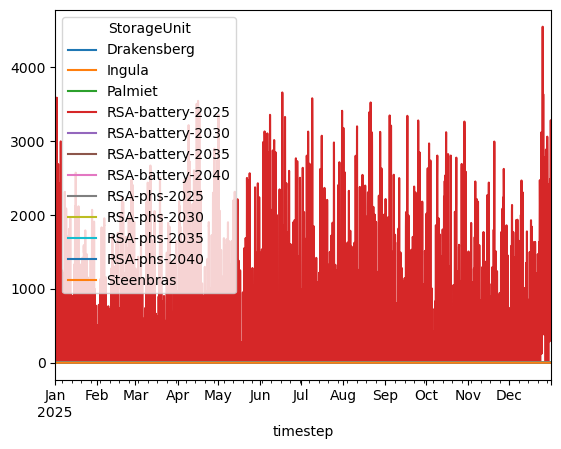

In [24]:
n0.storage_units_t.p_store.loc[2025].plot()

In [27]:
n0.storage_units.efficiency_dispatch

StorageUnit
Drakensberg         0.858487
Ingula              0.883176
Palmiet             0.882610
Steenbras           0.848528
RSA-phs-2025             NaN
RSA-phs-2030             NaN
RSA-phs-2035             NaN
RSA-phs-2040             NaN
RSA-battery-2025         NaN
RSA-battery-2030         NaN
RSA-battery-2035         NaN
RSA-battery-2040         NaN
Name: efficiency_dispatch, dtype: float64

In [49]:
n0.optimize.fix_optimal_capacities()

In [52]:
n0.generators.p_nom_extendable.max()

False